# Phase 1

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv('diabetes.csv')

df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
patient = df['Outcome'].value_counts()[0]
not_patient = df['Outcome'].value_counts()[1]

print(f"patient {patient} not patient {not_patient}")


patient 500 not patient 268


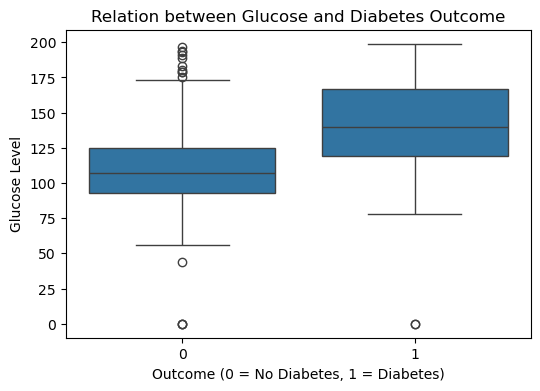

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Relation between Glucose and Diabetes Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Glucose Level")
plt.show()

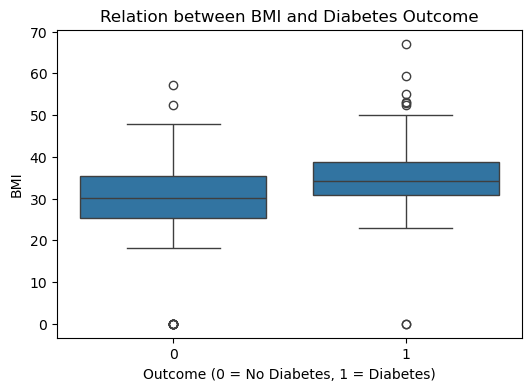

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Outcome", y="BMI", data=df)
plt.title("Relation between BMI and Diabetes Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("BMI")
plt.show()

# Phase 2

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Outcome' , axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled , columns=X.columns)

X_train , X_test , y_train , y_test = train_test_split(
    X_scaled , y, test_size=0.2 
)

In [18]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((614, 8), (614,), (154, 8), (154,))

# phase 3

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report

LR_model = LogisticRegression()

LR_model.fit(X_train , y_train)

y_pred = LR_model.predict(X_test)

print("Accuracy :" , accuracy_score(y_test , y_pred))

print("classification report is :\n" , classification_report(y_test , y_pred))


Accuracy : 0.7857142857142857
classification report is :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       109
           1       0.64      0.62      0.63        45

    accuracy                           0.79       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154



In [20]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear').fit(X_train , y_train)

y_pred_svm = svm_model.predict(X_test)

print("Accuracy :" , accuracy_score(y_test , y_pred_svm))

print("classification report is :\n" , classification_report(y_test , y_pred_svm))

Accuracy : 0.7727272727272727
classification report is :
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.61      0.60      0.61        45

    accuracy                           0.77       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.77      0.77      0.77       154



In [22]:
# try to change the kernal

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

svm_model_2 = svm.SVC(kernel='rbf')

grid = GridSearchCV(svm_model_2, param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

y_pred = grid.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.7703318672530988
Test Accuracy: 0.7792207792207793
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.62      0.62      0.62        45

    accuracy                           0.78       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.78      0.78      0.78       154



In [23]:
# save the three models
import joblib

joblib.dump(LR_model, "logistic_regression_model.pkl")
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(grid.best_estimator_ , "svm_model_rbf.pkl")

# Load models
loaded_log_reg = joblib.load("logistic_regression_model.pkl")
loaded_svm = joblib.load("svm_model.pkl")
loaded_svm_rbf = joblib.load("svm_model_rbf.pkl")

In [25]:
y_pred = loaded_log_reg.predict(X_test)
acc = accuracy_score(y_test , y_pred)

print(acc)

0.7857142857142857


In [26]:
# save the scaler

joblib.dump(scaler , "scaler.pkl")

['scaler.pkl']

# Phase 4

the main.py file